In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [31]:
image = plt.imread('/work/hpc/spine-segmentation/notebooks/ILSVRC2012_val_00031973.JPEG')
print(image.shape)

(500, 375, 3)


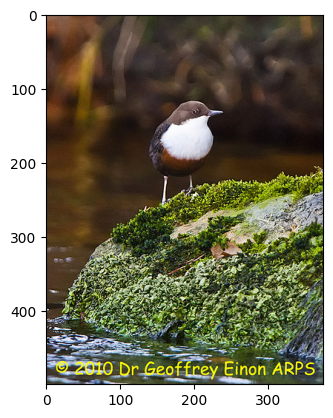

In [16]:
plt.imshow(image)

[[  0.8660254   -0.5        150.12023679]
 [  0.5          0.8660254  -60.25635095]]
[[   1.     0.  -187.5]
 [   0.     1.  -250. ]
 [   0.     0.     1. ]]


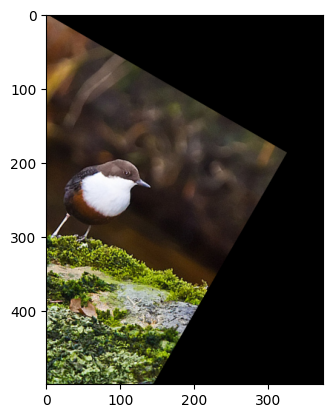

In [75]:
rotated_matrix = cv2.getRotationMatrix2D((0,0), 30, 1)

calc_matrix = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6), 0],
    [np.sin(np.pi/6), np.cos(np.pi/6), 0],
    [0, 0, 1],

])

translated_matrix = np.array([
    [1, 0, -image.shape[1]/2],
    [0, 1, -image.shape[0]/2],
    [0, 0, 1],
])

reverse_translated_matrix = np.array([
    [1, 0, image.shape[1]/2],
    [0, 1, image.shape[0]/2],
    [0, 0, 1],
])


all_matrix = reverse_translated_matrix @ calc_matrix @ translated_matrix

print(all_matrix[0:2])

print(translated_matrix)


rotated_image = cv2.warpAffine(image, calc_matrix[0:2], (image.shape[1], image.shape[0]))

plt.imshow(rotated_image)

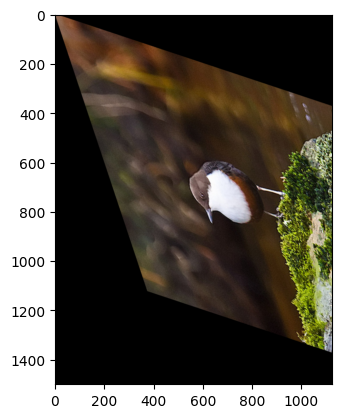

In [94]:
shear_matrixx = np.array([
    [1, 3, 0],
    [3, 1, 0],
    [0, 0, 1],
], dtype=float)

rotated_image = cv2.warpAffine(image, shear_matrixx[0:2], (image.shape[1]*3, image.shape[0]*3))
plt.imshow(rotated_image)

In [ ]:
np.mat